In [1]:
# libraries for data manipulation
import pandas as pd
import numpy as np
# data visualization
import seaborn as sns
from matplotlib import pyplot as plt
# reduction of the data dimensionality
from sklearn.decomposition import PCA
# variables scalation 
from sklearn.preprocessing import StandardScaler
# clustering libraries
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


In [2]:
File_to_work_with = '../Data/Proposed_structures_with_AI_caffeine_tanimoto_similarity_.xlsx'

In [3]:
initial = pd.read_excel(File_to_work_with)

In [4]:
initial.head()

,Unnamed: 0,new_SMILES,CID,PUBCHEM_SMILES,CN1C(N(C)CCCCCCCCN(C=C(/C=C(C(OC)=O)\S)[N+]([O-])=O)C)=NC2=C1C(N(C)C(N2C)=O)=O,CN(C(N1C)=O)C2=C(N(C)C(NCCCCN)=N2)C1=O,O=C1C2=C(N=C(SC3=NC4=C(C=CC=C4)N3CC5=CN(CCCCCCCCN=[N+]=[N-])N=N5)N2C)N(C)C(N1C)=O,O=C1C2=C(N=C(SC3=NC4=C(C=CC=C4)N3CC5=CN(CC6=C(CN=[N+]=[N-])C=CC=C6)N=N5)N2C)N(C)C(N1C)=O,O=C1C2=C(N=C(SC3=NC4=C(C=CC=C4)N3CC5=CN(CC6=CC=C(CN=[N+]=[N-])C=C6)N=N5)N2C)N(C)C(N1C)=O,O=C1C2=C(N=C(NCCCCN3C(C=CC3=O)=O)N2C)N(C)C(N1C)=O,...,CN1C(NCCCC/N=C2SCC(N/2)=O)=NC3=C1C(N(C)C(N3C)=O)=O,CN1C(NCCC/N=C2SCC(N/2)=O)=NC3=C1C(N(C)C(N3C)=O)=O,CN1C(SC2=NC3=C(N2)C=CC=C3)=NC2=C1C(=O)N(C)C(=O)N2C,CN(C(N1C)=S)C2=C(N(C)C=N2)C1=S,CN(C(N1C)=O)C2=C(N(C)C(NCCNC(C)=O)=N2)C1=O,CN1C(N(C)CCN(C=C(/C=C(C(OC)=O)\S)[N+]([O-])=O)C)=NC2=C1C(N(C)C(N2C)=O)=O,CN(C(N1C)=O)C2=C(N(C)C(NCCN)=N2)C1=O,CN(C(C(N(C)C(NCCCNCCCNCCCN)=N1)=C1N2C)=O)C2=O,CN(C(N1C)=O)C2=C(N(C)C=N2)C1=O,O=C1C2=C(N=C(SC3=NC4=C(C=CC=C4)N3CC5=CN(CCCCCN=[N+]=[N-])N=N5)N2C)N(C)C(N1C)=O
0,0,CN1N=C1Sc1ccccc1,0,0,0.103526,0.100000,0.097956,0.099865,0.099448,0.106419,...,0.109908,0.109349,0.107612,0.091011,0.101619,0.101504,0.101289,0.099910,0.101136,0.098164
1,1,CN1CCCCCCNCNc2c(n(C)c(=O)n(C)c2=O)N1,0,0,0.447923,0.414961,0.423472,0.434911,0.425926,0.428087,...,0.432997,0.430303,0.391627,0.298529,0.412587,0.436745,0.409059,0.416433,0.361111,0.423380
2,2,CNCCC1CCCN(C)Nc2c(c(=O)n(C)c(=O)n2C)N1,0,0,0.461974,0.427091,0.437165,0.454918,0.445363,0.441411,...,0.449967,0.445400,0.398154,0.305218,0.421736,0.450907,0.418396,0.429456,0.362211,0.437090
3,3,CN1CCC(CCNC=N)=Nc2c1n(C)c(=O)n(C)c2=O,0,0,0.479271,0.436214,0.458781,0.464182,0.455614,0.455873,...,0.458553,0.454008,0.409836,0.316537,0.429831,0.460821,0.424658,0.436562,0.366519,0.457860
4,4,CNCCCCCCN1CC2=C(N1)N(C)C(=O)N(C)C2,0,0,0.307278,0.265260,0.291906,0.294880,0.293785,0.291939,...,0.276204,0.275177,0.263656,0.228669,0.266069,0.297987,0.255656,0.272385,0.231164,0.290816


In [5]:
initial = initial.columns.values.tolist()

In [6]:
initial

['Unnamed: 0',
 'new_SMILES',
 'CID',
 'PUBCHEM_SMILES',
 'CN1C(N(C)CCCCCCCCN(C=C(/C=C(C(OC)=O)\\S)[N+]([O-])=O)C)=NC2=C1C(N(C)C(N2C)=O)=O',
 'CN(C(N1C)=O)C2=C(N(C)C(NCCCCN)=N2)C1=O',
 'O=C1C2=C(N=C(SC3=NC4=C(C=CC=C4)N3CC5=CN(CCCCCCCCN=[N+]=[N-])N=N5)N2C)N(C)C(N1C)=O',
 'O=C1C2=C(N=C(SC3=NC4=C(C=CC=C4)N3CC5=CN(CC6=C(CN=[N+]=[N-])C=CC=C6)N=N5)N2C)N(C)C(N1C)=O',
 'O=C1C2=C(N=C(SC3=NC4=C(C=CC=C4)N3CC5=CN(CC6=CC=C(CN=[N+]=[N-])C=C6)N=N5)N2C)N(C)C(N1C)=O',
 'O=C1C2=C(N=C(NCCCCN3C(C=CC3=O)=O)N2C)N(C)C(N1C)=O',
 'CN(C(C(N(C)C(NCCCNCCCCNCCCN)=N1)=C1N2C)=O)C2=O',
 'CN(C(N1C)=O)C2=C(N(C)C(SC3=CC=CC=C3)=N2)C1=O',
 'O=C1C2=C(N=C(NCCCCN3C(CCC3=O)=O)N2C)N(C)C(N1C)=O',
 'CNCCCCCCCCN(C)C1=NC2=C(N(C(N(C2=O)C)=O)C)N1C',
 'CNCCCCCCN(C)C1=NC2=C(N(C(N(C2=O)C)=O)C)N1C',
 'O=C1C2=C(N=C(NCCCN3C(C(C=CC=C4)=C4C3=O)=O)N2C)N(C)C(N1C)=O',
 'CN(C(N1C)=O)C2=C(N(C)C(NCCCCNC(C)=O)=N2)C1=O',
 'CN(C(C(N(C)C(NCCNCCCNCCN)=N1)=C1N2C)=O)C2=O',
 'CN(C)CCN(C1=NC2=C(N1C)N(C)C(N(C)C2=O)=O)C',
 'O=C1C2=C(N=C(NCCCN3C(CCC3=O)=O)N2

In [7]:
initial = initial[4:]

In [8]:
initial

['CN1C(N(C)CCCCCCCCN(C=C(/C=C(C(OC)=O)\\S)[N+]([O-])=O)C)=NC2=C1C(N(C)C(N2C)=O)=O',
 'CN(C(N1C)=O)C2=C(N(C)C(NCCCCN)=N2)C1=O',
 'O=C1C2=C(N=C(SC3=NC4=C(C=CC=C4)N3CC5=CN(CCCCCCCCN=[N+]=[N-])N=N5)N2C)N(C)C(N1C)=O',
 'O=C1C2=C(N=C(SC3=NC4=C(C=CC=C4)N3CC5=CN(CC6=C(CN=[N+]=[N-])C=CC=C6)N=N5)N2C)N(C)C(N1C)=O',
 'O=C1C2=C(N=C(SC3=NC4=C(C=CC=C4)N3CC5=CN(CC6=CC=C(CN=[N+]=[N-])C=C6)N=N5)N2C)N(C)C(N1C)=O',
 'O=C1C2=C(N=C(NCCCCN3C(C=CC3=O)=O)N2C)N(C)C(N1C)=O',
 'CN(C(C(N(C)C(NCCCNCCCCNCCCN)=N1)=C1N2C)=O)C2=O',
 'CN(C(N1C)=O)C2=C(N(C)C(SC3=CC=CC=C3)=N2)C1=O',
 'O=C1C2=C(N=C(NCCCCN3C(CCC3=O)=O)N2C)N(C)C(N1C)=O',
 'CNCCCCCCCCN(C)C1=NC2=C(N(C(N(C2=O)C)=O)C)N1C',
 'CNCCCCCCN(C)C1=NC2=C(N(C(N(C2=O)C)=O)C)N1C',
 'O=C1C2=C(N=C(NCCCN3C(C(C=CC=C4)=C4C3=O)=O)N2C)N(C)C(N1C)=O',
 'CN(C(N1C)=O)C2=C(N(C)C(NCCCCNC(C)=O)=N2)C1=O',
 'CN(C(C(N(C)C(NCCNCCCNCCN)=N1)=C1N2C)=O)C2=O',
 'CN(C)CCN(C1=NC2=C(N1C)N(C)C(N(C)C2=O)=O)C',
 'O=C1C2=C(N=C(NCCCN3C(CCC3=O)=O)N2C)N(C)C(N1C)=O',
 'CN(C(N1C)=O)C2=C(N(C)C(NCC3=CNC=N3)=N2

In [9]:
generated_smiles = pd.read_excel(File_to_work_with)

In [10]:
generated_smiles = generated_smiles['new_SMILES']

In [11]:
generated_smiles

0                            CN1N=C1Sc1ccccc1
1        CN1CCCCCCNCNc2c(n(C)c(=O)n(C)c2=O)N1
2      CNCCC1CCCN(C)Nc2c(c(=O)n(C)c(=O)n2C)N1
3       CN1CCC(CCNC=N)=Nc2c1n(C)c(=O)n(C)c2=O
4          CNCCCCCCN1CC2=C(N1)N(C)C(=O)N(C)C2
                        ...                  
378         CN(C=O)C(=O)N(C)C(=O)CCN1C#CC=CC1
379       CN1CC(=O)C(NN2C#CC=CC2)N(C)C(=O)C1O
380        CN(C=O)C(C=O)N(C)C(=O)CCN1C#CC=CC1
381           CN(C=O)C(=O)N(CC=O)CNN1C#CC=CC1
382          CNCCCN(CN)CN(C)C(=O)CCN1C#CC=CC1
Name: new_SMILES, Length: 383, dtype: object

## Molecular descriptors to be used

In [12]:
from rdkit import Chem
from mordred import Calculator, descriptors, Lipinski
import mordred

In [13]:
descriptor1_initials = []
descriptor1_generated = []

descriptor2_initials = []
descriptor2_generated = []

descriptor3_initials = []
descriptor3_generated = []


In [14]:
mol_objs_ini = [Chem.MolFromSmiles(smi) for smi in initial]
mol_objs_gen = [Chem.MolFromSmiles(smi) for smi in generated_smiles]

In [15]:
calc = Calculator(descriptors, ignore_3D=True)
molecular_descriptors_initials = calc.pandas(mol_objs_ini)
molecular_descriptors_generated = calc.pandas(mol_objs_gen)

100%|████████████████████████████████████████████████████████████████████████████████| 383/383 [00:04<00:00, 78.91it/s]


In [16]:
molecular_descriptors_initials.head()

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,28.335611,22.700065,0,0,46.710781,2.545706,4.974599,46.710781,1.229231,4.525761,...,10.435556,88.765838,551.252603,7.350035,6324,61,186.0,216.0,16.555556,8.638889
1,15.072670,13.353770,0,1,25.206271,2.535622,4.964134,25.206271,1.260314,3.912530,...,10.009783,68.084990,280.164774,7.004119,827,34,102.0,123.0,8.388889,4.555556
2,31.921913,23.549860,0,0,53.441916,2.551311,4.980028,53.441916,1.303461,4.643925,...,10.644972,95.611998,576.249189,7.893825,6835,66,216.0,258.0,12.805556,9.138889
3,32.588580,24.645490,0,0,54.116554,2.551378,4.980094,54.116554,1.319916,4.662598,...,10.763695,95.991567,568.186589,8.741332,6121,71,226.0,275.0,12.527778,8.916667
4,32.629020,23.925112,0,0,54.104226,2.551359,4.980075,54.104226,1.319615,4.662499,...,10.748776,95.963887,568.186589,8.741332,6369,70,226.0,274.0,12.527778,8.888889


In [17]:
molecular_descriptors_generated.head()

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,8.554231,8.087215,0,2,14.380366,2.377203,4.536959,14.380366,1.307306,3.392622,...,9.154299,60.592294,164.040819,8.633727,166,10,56.0,64.0,3.083333,2.444444
1,16.567764,13.016759,0,1,27.794695,2.453752,4.907087,27.794695,1.263395,3.993207,...,9.889744,55.730558,310.211724,6.462744,984,37,108.0,125.0,8.277778,5.000000
2,16.567764,14.065493,0,1,27.678576,2.465833,4.923272,27.678576,1.258117,3.997315,...,9.963029,58.881465,310.211724,6.462744,969,39,110.0,129.0,8.888889,5.000000
3,15.820217,13.725063,0,2,26.317530,2.490744,4.952912,26.317530,1.253216,3.954815,...,9.986679,62.868319,292.164774,7.125970,893,39,106.0,126.0,8.638889,4.777778
4,15.015651,12.418646,0,1,25.378259,2.465851,4.830995,25.378259,1.268913,3.903059,...,9.759213,67.158639,281.221560,5.983437,961,28,98.0,113.0,7.166667,4.611111


In [18]:
def is_morder_missing(x):
    return np.nan if type(x) == mordred.error.Missing or type(x) == mordred.error.Error else x 

In [19]:
molecular_descriptors_initials = molecular_descriptors_initials.applymap(is_morder_missing)
molecular_descriptors_generated = molecular_descriptors_generated.applymap(is_morder_missing)

In [20]:
simple_preprocessing = True
if simple_preprocessing:
    molecular_descriptors_initials = molecular_descriptors_initials.dropna(axis=1, how='any')
    molecular_descriptors_generated = molecular_descriptors_generated.dropna(axis=1, how='any')

In [21]:
print(molecular_descriptors_initials.isna().sum().sum())
print(molecular_descriptors_generated.isna().sum().sum())
print(molecular_descriptors_initials.shape)
print(molecular_descriptors_generated.shape)

0
0
(58, 1388)
(383, 1277)


In [22]:
molecular_descriptors_initials = molecular_descriptors_initials.loc[:, (molecular_descriptors_initials != 0).any(axis=0)]
molecular_descriptors_generated = molecular_descriptors_generated.loc[:, (molecular_descriptors_generated != 0).any(axis=0)]

In [23]:
print(molecular_descriptors_initials.shape)
print(molecular_descriptors_generated.shape)

(58, 1137)
(383, 1128)


### Chosen descriptors:

-> "MW"

-> "Diameter"?

-> "SlogP"

-> "TopoPSA"

-> "WPol" -> the Wiener Polarity Number

-> "nRing" -> ring count

-> "AATS0Z" -> averaged moreau-broto autocorrelation of lag 0 weighted by atomic number

In [24]:
preserve_only_common_columns = []
for element in list(molecular_descriptors_initials.columns):
    if element in list(molecular_descriptors_generated.columns):
        preserve_only_common_columns.append(element)
    else:
        print("Not found in generated structures : ", element)

Not found in generated structures :  AATS6dv
Not found in generated structures :  AATS7dv
Not found in generated structures :  AATS6d
Not found in generated structures :  AATS7d
Not found in generated structures :  AATS6s
Not found in generated structures :  AATS7s
Not found in generated structures :  AATS6Z
Not found in generated structures :  AATS7Z
Not found in generated structures :  AATS6m
Not found in generated structures :  AATS7m
Not found in generated structures :  AATS6v
Not found in generated structures :  AATS7v
Not found in generated structures :  AATS6se
Not found in generated structures :  AATS7se
Not found in generated structures :  AATS6pe
Not found in generated structures :  AATS7pe
Not found in generated structures :  AATS6are
Not found in generated structures :  AATS7are
Not found in generated structures :  AATS6p
Not found in generated structures :  AATS7p
Not found in generated structures :  AATS6i
Not found in generated structures :  AATS7i
Not found in generated

In [25]:
len(preserve_only_common_columns)

1026

In [26]:
print(preserve_only_common_columns)

['ABC', 'ABCGG', 'nBase', 'SpAbs_A', 'SpMax_A', 'SpDiam_A', 'SpAD_A', 'SpMAD_A', 'LogEE_A', 'VE1_A', 'VE2_A', 'VE3_A', 'VR1_A', 'VR2_A', 'VR3_A', 'nAromAtom', 'nAromBond', 'nAtom', 'nHeavyAtom', 'nHetero', 'nH', 'nC', 'nN', 'nO', 'nS', 'ATS0dv', 'ATS1dv', 'ATS2dv', 'ATS3dv', 'ATS4dv', 'ATS5dv', 'ATS6dv', 'ATS7dv', 'ATS8dv', 'ATS0d', 'ATS1d', 'ATS2d', 'ATS3d', 'ATS4d', 'ATS5d', 'ATS6d', 'ATS7d', 'ATS8d', 'ATS0s', 'ATS1s', 'ATS2s', 'ATS3s', 'ATS4s', 'ATS5s', 'ATS6s', 'ATS7s', 'ATS8s', 'ATS0Z', 'ATS1Z', 'ATS2Z', 'ATS3Z', 'ATS4Z', 'ATS5Z', 'ATS6Z', 'ATS7Z', 'ATS8Z', 'ATS0m', 'ATS1m', 'ATS2m', 'ATS3m', 'ATS4m', 'ATS5m', 'ATS6m', 'ATS7m', 'ATS8m', 'ATS0v', 'ATS1v', 'ATS2v', 'ATS3v', 'ATS4v', 'ATS5v', 'ATS6v', 'ATS7v', 'ATS8v', 'ATS0se', 'ATS1se', 'ATS2se', 'ATS3se', 'ATS4se', 'ATS5se', 'ATS6se', 'ATS7se', 'ATS8se', 'ATS0pe', 'ATS1pe', 'ATS2pe', 'ATS3pe', 'ATS4pe', 'ATS5pe', 'ATS6pe', 'ATS7pe', 'ATS8pe', 'ATS0are', 'ATS1are', 'ATS2are', 'ATS3are', 'ATS4are', 'ATS5are', 'ATS6are', 'ATS7are', '

## Clustering issue

In [27]:
data_to_be_clustered = molecular_descriptors_initials[preserve_only_common_columns].append(molecular_descriptors_generated[preserve_only_common_columns])

C:\Users\aleks\AppData\Local\Temp\ipykernel_21416\3123629812.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_to_be_clustered = molecular_descriptors_initials[preserve_only_common_columns].append(molecular_descriptors_generated[preserve_only_common_columns])


In [28]:
data_to_be_clustered.shape

(441, 1026)

In [29]:
data_to_be_clustered.head()

,ABC,ABCGG,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,VE1_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,28.335611,22.700065,0,46.710781,2.545706,4.974599,46.710781,1.229231,4.525761,3.789874,...,10.435556,88.765838,551.252603,7.350035,6324,61,186.0,216.0,16.555556,8.638889
1,15.072670,13.353770,1,25.206271,2.535622,4.964134,25.206271,1.260314,3.912530,3.677538,...,10.009783,68.084990,280.164774,7.004119,827,34,102.0,123.0,8.388889,4.555556
2,31.921913,23.549860,0,53.441916,2.551311,4.980028,53.441916,1.303461,4.643925,4.644705,...,10.644972,95.611998,576.249189,7.893825,6835,66,216.0,258.0,12.805556,9.138889
3,32.588580,24.645490,0,54.116554,2.551378,4.980094,54.116554,1.319916,4.662598,4.689057,...,10.763695,95.991567,568.186589,8.741332,6121,71,226.0,275.0,12.527778,8.916667
4,32.629020,23.925112,0,54.104226,2.551359,4.980075,54.104226,1.319615,4.662499,4.675772,...,10.748776,95.963887,568.186589,8.741332,6369,70,226.0,274.0,12.527778,8.888889


In [30]:
data_to_be_clustered = data_to_be_clustered.reset_index()

In [31]:
data_to_be_clustered.shape

(441, 1027)

In [32]:
data_to_be_clustered = data_to_be_clustered.drop(columns=['index'])

In [33]:
data_to_be_clustered.shape

(441, 1026)

In [34]:
## normalization of data, the result can be obtianed without this step

In [34]:
data_to_be_clustered = (data_to_be_clustered - data_to_be_clustered.mean()) / data_to_be_clustered.std()

In [35]:
pca = PCA(n_components=3)
df_pca = pca.fit_transform(data_to_be_clustered)
df = pd.DataFrame(df_pca, columns=['c1', 'c2', 'c3'], index=data_to_be_clustered.index)

In [36]:
df.head()

,c1,c2,c3
0,54.207741,1.981712,-13.326867
1,-1.360827,-10.293394,-10.581346
2,63.340419,-1.401960,10.699149
3,60.218376,-14.290749,18.406107
4,60.155016,-13.915788,18.666890


In [37]:
PCA_names = pd.DataFrame(pca.components_,columns=data_to_be_clustered.columns,index = ['PC-1','PC-2','PC-3'])

In [38]:
PCA_names

,ABC,ABCGG,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,VE1_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
PC-1,0.053434,0.052707,-0.003494,0.053277,0.018277,0.016793,0.053277,0.013688,0.052635,0.028856,...,0.035365,0.043077,0.053052,0.007446,0.048880,0.048209,0.052752,0.051204,0.046077,0.052269
PC-2,0.000649,-0.005970,0.032848,0.004275,-0.028189,-0.033094,0.004275,-0.022582,0.000943,-0.024284,...,-0.030398,-0.008569,0.006387,-0.061791,0.011702,-0.023290,-0.007789,-0.015217,-0.004335,0.014374
PC-3,0.010681,-0.002198,-0.033261,0.011658,0.000646,-0.011074,0.011658,0.061726,0.002332,-0.003153,...,0.004603,0.013133,0.006596,0.058906,0.015757,-0.002855,0.013014,0.014023,-0.043023,0.002446


In [39]:
PCA_names_transposed = PCA_names.transpose()

In [40]:
PCA_names_transposed.head()

,PC-1,PC-2,PC-3
ABC,0.053434,0.000649,0.010681
ABCGG,0.052707,-0.005970,-0.002198
nBase,-0.003494,0.032848,-0.033261
SpAbs_A,0.053277,0.004275,0.011658
SpMax_A,0.018277,-0.028189,0.000646


In [41]:
max(PCA_names_transposed['PC-1']), min(PCA_names_transposed['PC-1'])

(0.05343391603605064, -0.05082514740623228)

In [42]:
#### Select three descriptors for data selection
PCA_names_transposed.loc[(PCA_names_transposed['PC-1'] == max(PCA_names_transposed['PC-1'])) 
                         | (PCA_names_transposed['PC-1'] == min(PCA_names_transposed['PC-1']))]

,PC-1,PC-2,PC-3
ABC,0.053434,0.000649,0.010681
VE2_Dzp,-0.050825,-0.005941,0.009882


In [43]:
max(PCA_names_transposed['PC-2']), min(PCA_names_transposed['PC-2'])

(0.0639509441413185, -0.0751909559635823)

In [44]:
PCA_names_transposed.loc[(PCA_names_transposed['PC-2'] == max(PCA_names_transposed['PC-2'])) 
                         | (PCA_names_transposed['PC-2'] == min(PCA_names_transposed['PC-2']))]

,PC-1,PC-2,PC-3
AATS2dv,0.008650,-0.075191,0.004362
GATS1dv,-0.014731,0.063951,0.013530


In [45]:
max(PCA_names_transposed['PC-3']), min(PCA_names_transposed['PC-3'])

(0.09487113206282263, -0.1040819383442225)

In [46]:
PCA_names_transposed.loc[(PCA_names_transposed['PC-3'] == max(PCA_names_transposed['PC-3'])) 
                         | (PCA_names_transposed['PC-3'] == min(PCA_names_transposed['PC-3']))]

,PC-1,PC-2,PC-3
AATS1p,0.011709,-0.024966,0.094871
GATS1i,-0.010660,-0.003168,-0.104082


In [47]:
#### Already selected descriptors
descriptor1 = 'GATS3c'
descriptor2 = 'WPol'
descriptor3 = 'AATS0Z'

In [48]:
PCA_names[descriptor1] #best is MID (normal molecular id(sum of all atomic id))

PC-1    0.011817
PC-2   -0.042663
PC-3   -0.032194
Name: GATS3c, dtype: float64

In [49]:
PCA_names[descriptor2] #best is AATS2dv (averaged moreau-broto autocorrelation of lag 2 weighted by valence electrons)

PC-1    0.048209
PC-2   -0.023290
PC-3   -0.002855
Name: WPol, dtype: float64

In [50]:
PCA_names[descriptor3] #best is ETA_dPsi_A (https://mordred-descriptor.github.io/documentation/master/api/mordred.ExtendedTopochemicalAtom.html#mordred.ExtendedTopochemicalAtom.EtaDeltaPsi)

PC-1    0.006479
PC-2   -0.048813
PC-3    0.060692
Name: AATS0Z, dtype: float64

In [51]:
df.agg(['mean', 'median', 'std', 'min', 'max']).round(2)

,c1,c2,c3
mean,-0.00,0.00,0.00
median,-3.03,0.43,-0.75
std,18.55,12.50,8.60
min,-57.60,-29.44,-17.34
max,76.57,29.88,29.09


C:\Users\aleks\AppData\Local\Temp\ipykernel_21416\540614336.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.c1, color = '#eb6c6a').set(title = 'Density plot - variable c1')


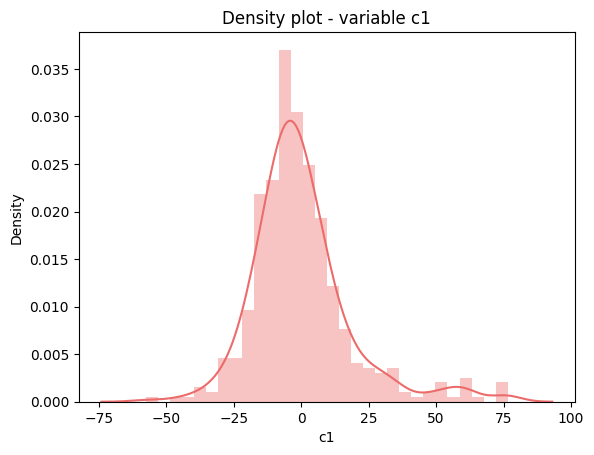

C:\Users\aleks\AppData\Local\Temp\ipykernel_21416\540614336.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.c2, color = '#eb6c6a').set(title = 'Density plot - variable c2')


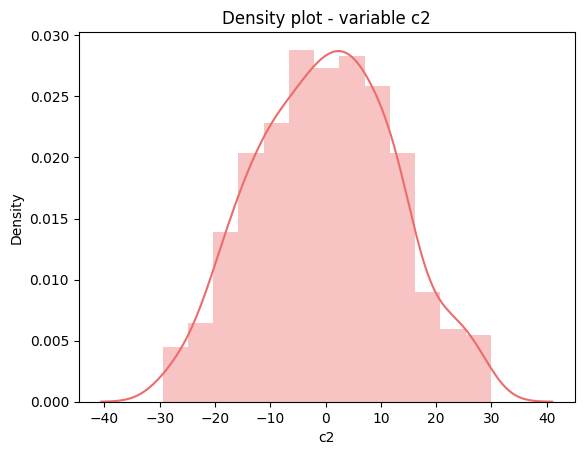

C:\Users\aleks\AppData\Local\Temp\ipykernel_21416\540614336.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.c3, color = '#eb6c6a').set(title = 'Density plot - variable c3')


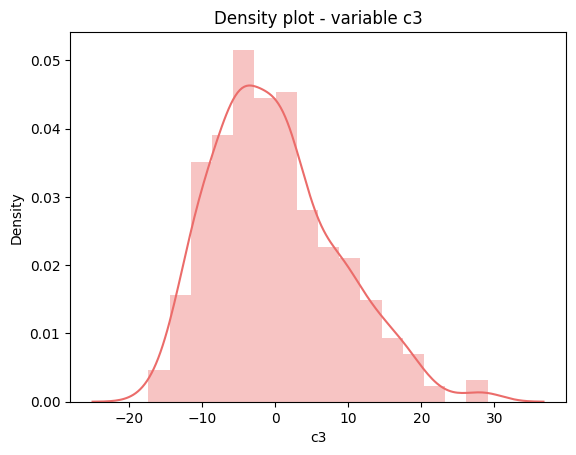

In [52]:
sns.distplot(df.c1, color = '#eb6c6a').set(title = 'Density plot - variable c1')
plt.show()
sns.distplot(df.c2, color = '#eb6c6a').set(title = 'Density plot - variable c2')
plt.show()
sns.distplot(df.c3, color = '#eb6c6a').set(title = 'Density plot - variable c3')
plt.show()

In [53]:
for col in df:
    if df[col].min() <= 0:
        df[col] = df[col] + np.abs(df[col].min()) + 1

In [54]:
df = np.log(df)

In [55]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

low_boundary = (q1 - 1.5 * iqr)
upp_boundary = (q3 + 1.5 * iqr)
num_of_outliers_L = (df[iqr.index] < low_boundary).sum()
num_of_outliers_U = (df[iqr.index] > upp_boundary).sum()
outliers = pd.DataFrame({'lower_boundary':low_boundary, 'upper_boundary':upp_boundary,'num_of_outliers__lower_boundary':num_of_outliers_L, 'num_of_outliers__upper_boundary':num_of_outliers_U})

In [56]:
outliers

,lower_boundary,upper_boundary,num_of_outliers__lower_boundary,num_of_outliers__upper_boundary
c1,3.418459,4.631081,14,18
c2,2.131698,4.594315,14,0
c3,1.507916,4.139118,9,0


In [57]:
df.head()

,c1,c2,c3
0,4.725660,3.478747,1.612748
1,4.047189,3.002905,2.049253
2,4.803509,3.368516,3.368763
3,4.777572,2.781711,3.604126
4,4.777039,2.804668,3.611197


In [58]:
df.shape

(441, 3)

In [59]:
df_ref = df.copy()

In [60]:
df_ref.shape

(441, 3)

In [61]:
for row in outliers.iterrows():
    print(row[1]['lower_boundary'])

3.4184590018679373
2.13169797955922
1.50791556592423


In [62]:
## Records that do not meet three ifs are deleted.
for row in outliers.iterrows():
    df = df[(df[row[0]] >= row[1]['lower_boundary']) 
            & (df[row[0]] <= row[1]['upper_boundary'])]

In [63]:
df.shape

(386, 3)

In [64]:
df = df.reset_index()

In [65]:
df = df.drop(columns=['index'])

In [66]:
df_ref['new_number'] = 'tst'

In [67]:
## decode_structures_from_clusters

for i in range(len(df_ref)):
    for m in range(len(df)):
        
        if df_ref['c1'][i] == df['c1'][m] and df_ref['c2'][i] == df['c2'][m] and df_ref['c3'][i] == df['c3'][m]:
            df_ref['new_number'][i] = m
        else:
            pass
        

C:\Users\aleks\AppData\Local\Temp\ipykernel_21416\1910909210.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ref['new_number'][i] = m


In [68]:
df_ref.head() # tst means that this structure has been removed...

,c1,c2,c3,new_number
0,4.725660,3.478747,1.612748,tst
1,4.047189,3.002905,2.049253,0
2,4.803509,3.368516,3.368763,tst
3,4.777572,2.781711,3.604126,tst
4,4.777039,2.804668,3.611197,tst


In [69]:
df_ref.to_excel('../Data/clustering_numbers.xlsx')

In [70]:
scaler = StandardScaler()
scaler.fit(df)
df_std = scaler.transform(df)
df = pd.DataFrame(data=df_std, index=df.index, columns=df.columns)

C:\Users\aleks\AppData\Local\Temp\ipykernel_21416\540614336.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.c1, color = '#eb6c6a').set(title = 'Density plot - variable c1')


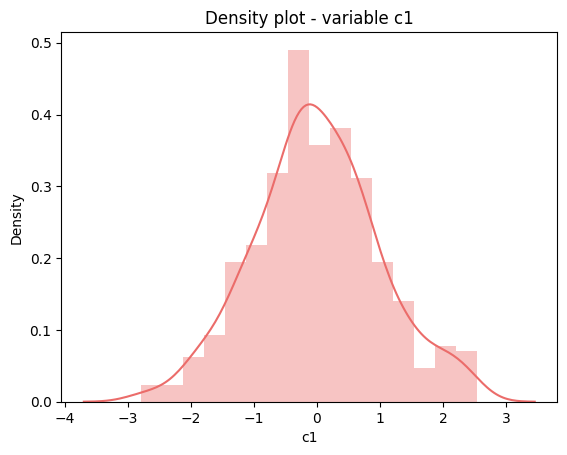

C:\Users\aleks\AppData\Local\Temp\ipykernel_21416\540614336.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.c2, color = '#eb6c6a').set(title = 'Density plot - variable c2')


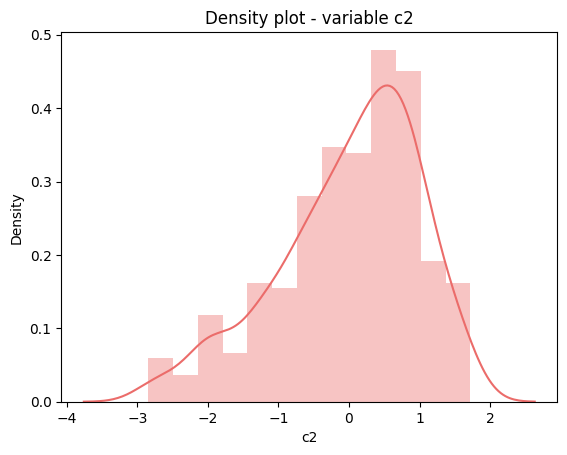

C:\Users\aleks\AppData\Local\Temp\ipykernel_21416\540614336.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.c3, color = '#eb6c6a').set(title = 'Density plot - variable c3')


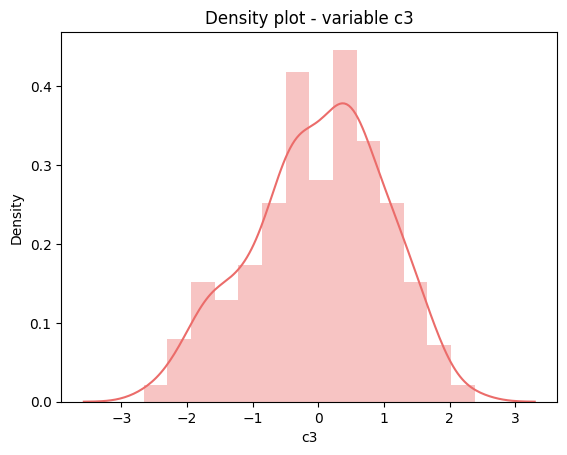

In [71]:
sns.distplot(df.c1, color = '#eb6c6a').set(title = 'Density plot - variable c1')
plt.show()
sns.distplot(df.c2, color = '#eb6c6a').set(title = 'Density plot - variable c2')
plt.show()
sns.distplot(df.c3, color = '#eb6c6a').set(title = 'Density plot - variable c3')
plt.show()

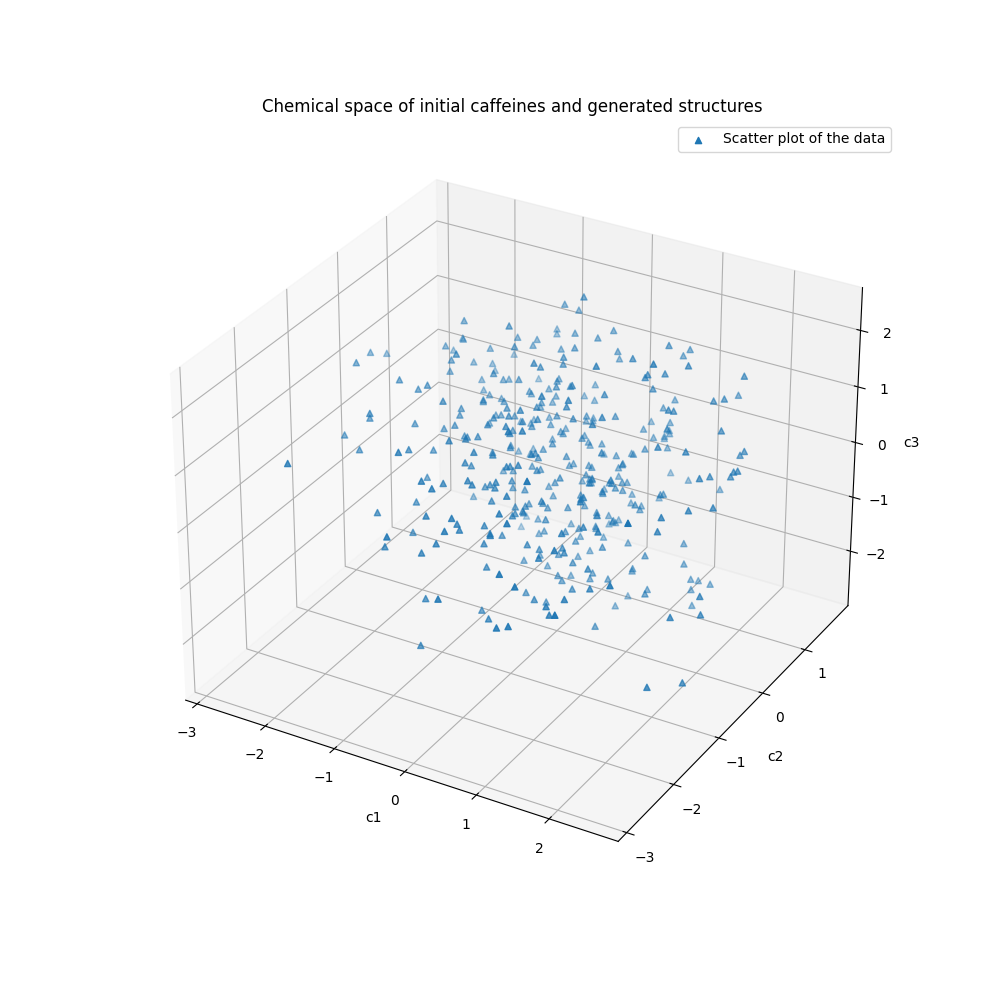

In [72]:
%matplotlib widget
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

ax.scatter(df.c1, df.c2, df.c3, marker='^')
ax.legend(['Scatter plot of the data'])
ax.set_title('Chemical space of initial caffeines and generated structures')
ax.set_xlabel('c1')
ax.set_ylabel('c2')
ax.set_zlabel('c3')
#plt.show()
plt.ion()

In [73]:
model_1 = AgglomerativeClustering(linkage='ward', affinity='euclidean', n_clusters=10).fit(df)

C:\Users\aleks\anaconda3\envs\cheminf_gpu\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [74]:
df['label_1'] = model_1.labels_

In [75]:
df.head()

,c1,c2,c3,label_1
0,0.107634,-0.835059,-1.617815,2
1,1.296261,-1.816788,-0.523635,4
2,1.697668,0.781302,-2.108292,2
3,1.328545,-1.329700,-0.701097,4
4,1.844378,-2.845490,0.219970,4


In [76]:
bins = [i for i in range(10)]

In [77]:
bins

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [78]:
dfv = pd.DataFrame(data=bins, columns=['BINS'])

In [79]:
df.iloc[2]['label_1']

2.0

In [80]:
list_of_names = []
for i in range(len(bins)):
    list_of_names.append('df_'+str(i))

In [81]:
for i in range(len(bins)):
    list_of_names[i] = pd.DataFrame()

In [82]:
pd.DataFrame(df.iloc[2:5])

,c1,c2,c3,label_1
2,1.697668,0.781302,-2.108292,2
3,1.328545,-1.329700,-0.701097,4
4,1.844378,-2.845490,0.219970,4


In [83]:
label_0 = df.loc[df['label_1'] == 1]

In [84]:
label_0.head()

,c1,c2,c3,label_1
17,2.259584,-0.143199,0.186088,1
19,2.098613,-0.430930,0.289403,1
26,1.922833,-0.744446,0.337279,1
27,2.542982,-1.215121,-1.999791,1
32,2.369450,-1.714275,-1.743201,1


In [85]:
for i in range(len(list_of_names)):
    list_of_names[i] = df.loc[df['label_1'] == i]

In [86]:
for i in range(len(bins)):
    print('Label '+ str(i) + ' ', str(list_of_names[i].shape))

Label 0  (44, 4)
Label 1  (16, 4)
Label 2  (40, 4)
Label 3  (36, 4)
Label 4  (25, 4)
Label 5  (34, 4)
Label 6  (69, 4)
Label 7  (37, 4)
Label 8  (57, 4)
Label 9  (28, 4)


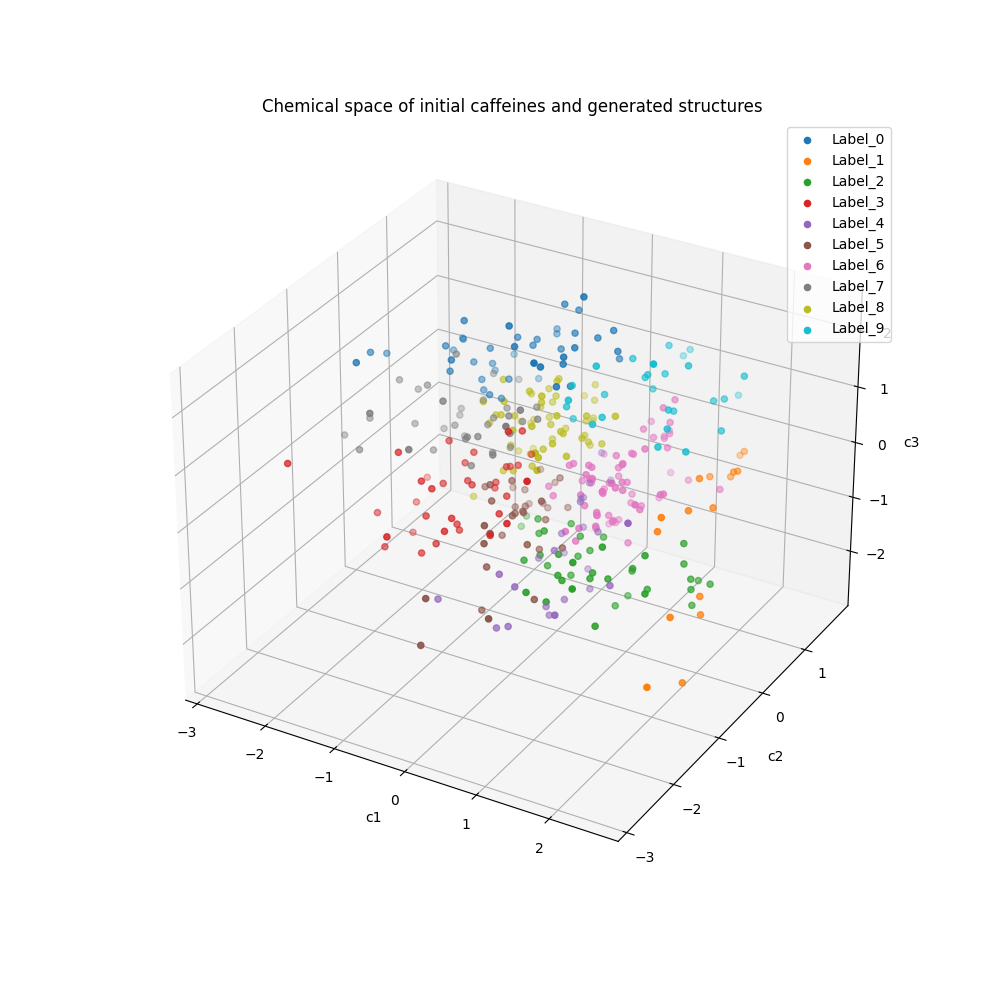

In [87]:
%matplotlib widget
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

for element in list_of_names:
    ax.scatter(element.c1, element.c2, element.c3)
#ax.scatter(df.c1, df.c2, df.c3, marker='^')
legend = []
for i in range(len(list_of_names)):
    legend.append('Label_'+ str(i))
    
ax.legend(legend)
ax.set_title('Chemical space of initial caffeines and generated structures')
ax.set_xlabel('c1')
ax.set_ylabel('c2')
ax.set_zlabel('c3')
#plt.show()
plt.ion()